In [1]:
import ptc_track.optics_parameters as ptc_track_optics
import ptc_track.madx_configuration as ptc_track_conf
import ptc_twiss.optics_parameters as ptc_twiss_optics
import ptc_twiss.madx_configuration as ptc_twiss_conf
import approximator.optics_parameters as approximator_optics
import approximator.runner as aproximator_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as visualizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2017_nominal"

ptc_twiss_script_file_name = "ptc_twiss_script.madx"

xml_file_name = "configuration_reco_beam1.xml"
item_number = 2

serialized_approximator_file_name = "parametrization_6500GeV_0p4_total.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

name_of_folder_with_sources = "optics_generator_python"

In [3]:
path_to_script = os.path.join(path_to_project, optic_folder_name, ptc_twiss_script_file_name)
s = 219.55
twiss_configuration = ptc_twiss_conf.TwissConfiguration(path_to_script, s)

In [4]:
path_to_optic = os.path.join(path_to_project, optic_folder_name)
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
track_configuration = ptc_track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_optic)

In [5]:
path_to_sources = os.path.join(path_to_project, name_of_folder_with_sources)
path_to_approximator = os.path.join(path_to_optic, serialized_approximator_file_name)
# approximator = aproximator_runner.get_approximator(path_to_sources, path_to_approximator, approximator_name)

In [6]:
# Parameters of bunch
x_mean = 0.0002
delta_x = 0.000
theta_x_mean = 0.000140
delta_theta_x = 0.0000
y_mean = 0.0000
delta_y = 0
theta_y_mean = 0.00
delta_theta_y = 0
pt_mean = -0.15
delta_pt = 0.15

x_resolution = 1
theta_x_resolution = 11
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 31

In [7]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, delta_x, x_resolution,
                                                        theta_x_mean, delta_theta_x, theta_x_resolution,
                                                        y_mean, delta_y, y_resolution,
                                                        theta_y_mean, delta_theta_y, theta_y_resolution,
                                                        pt_mean, delta_pt, pt_resolution)

In [8]:
title_suffix = "2017 nominal"

(341,)
(341, 5)
(341,)


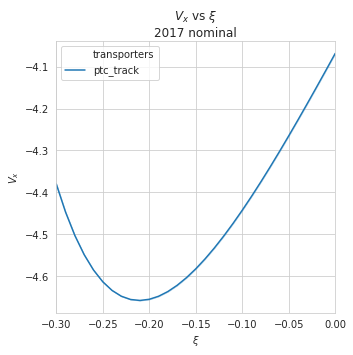

In [ ]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_v_x, track_configuration),
#     "new approximator": (approximator_optics.compute_v_x, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V x", title_suffix)

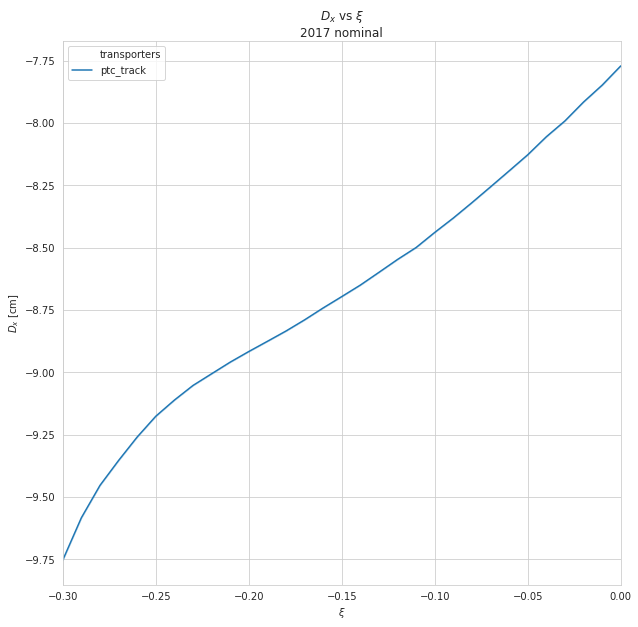

In [ ]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_x, track_configuration),
#     "new approximator": (approximator_optics.compute_d_x, approximator),
#     "ptc_twiss": (ptc_twiss_optics.compute_d_x, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", title_suffix, plot_size=10)
# axes.set_yticks(list(-14.5 + x for x in range(10)))
# axes.set_ylim(-14.5, -6.5)

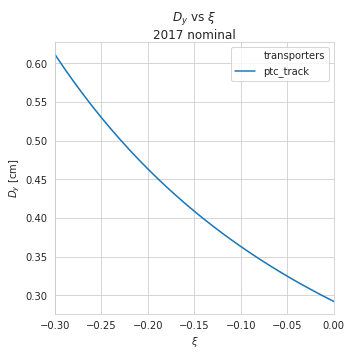

In [ ]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_y, track_configuration),
#     "new approximator": (approximator_optics.compute_d_y, approximator),
#     "ptc_twiss": (ptc_twiss_optics.compute_d_y, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D y", title_suffix)
# axes.set_yticks(list(-4 + x * 0.25 for x in range(12)))
# axes.set_ylim(-4, -1.75)

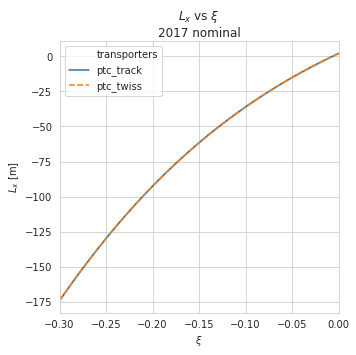

In [ ]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_x, track_configuration),
#     "new approximator": (approximator_optics.compute_l_x, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_x, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L x", title_suffix)
# axes.set_yticks(list(-250 + 25 * x for x in range(11)))
# axes.set_ylim(-225, 25)

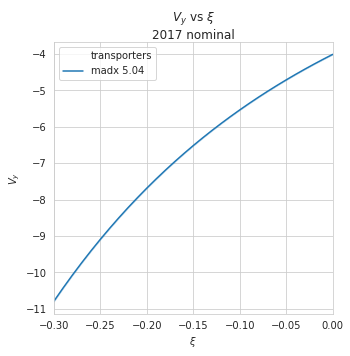

In [ ]:
transporters = {
    "madx 5.04": (ptc_track_optics.compute_v_y, track_configuration),
#     "new approximator": (approximator_optics.compute_v_y, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V y", title_suffix)

In [ ]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_y, track_configuration),
#     "new approximator": (approximator_optics.compute_l_y, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_y, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L y", title_suffix)